In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_train = pd.read_csv(r"C:\Users\Rafael Magnusson\Desktop\VSCode\Obesity_kaggle\train.csv")
df_test = pd.read_csv(r"C:\Users\Rafael Magnusson\Desktop\VSCode\Obesity_kaggle\test.csv")

Exploratory Data Analysis

In [ ]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


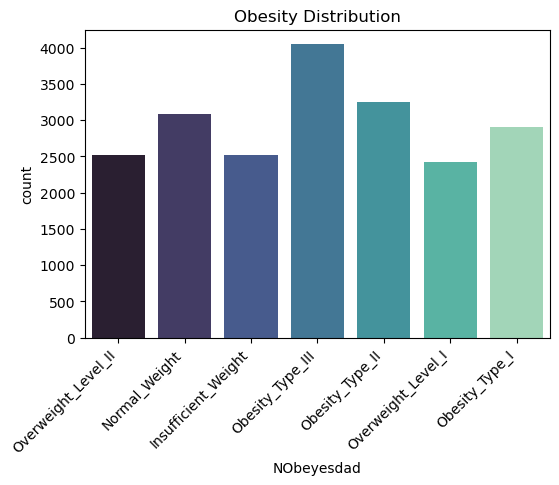

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()

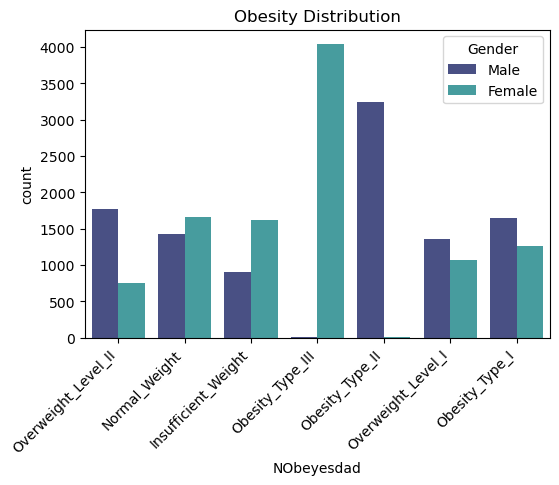

In [ ]:
#Observe correlations withe gender

ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, hue = "Gender", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()


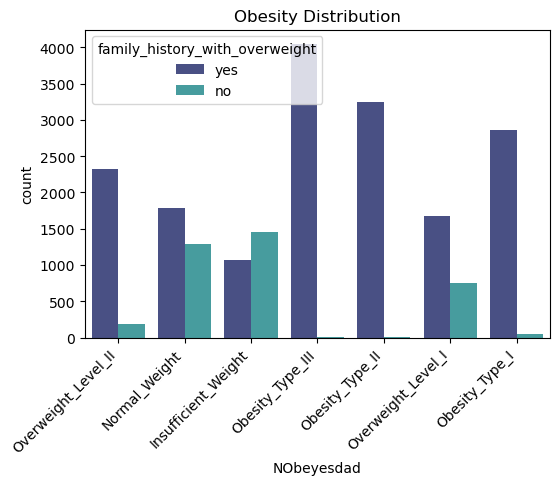

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, hue = "family_history_with_overweight", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()


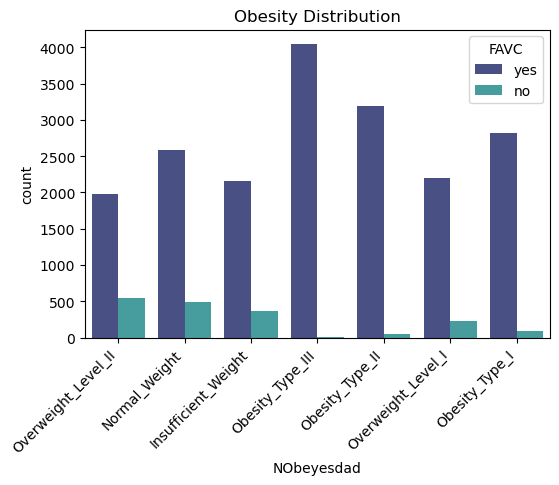

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, hue = "FAVC", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()


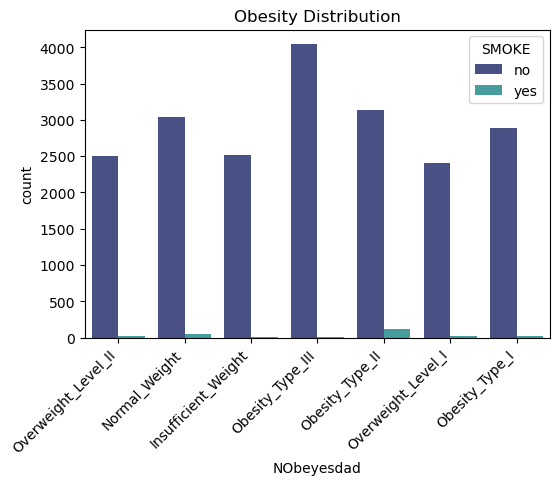

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, hue = "SMOKE", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()


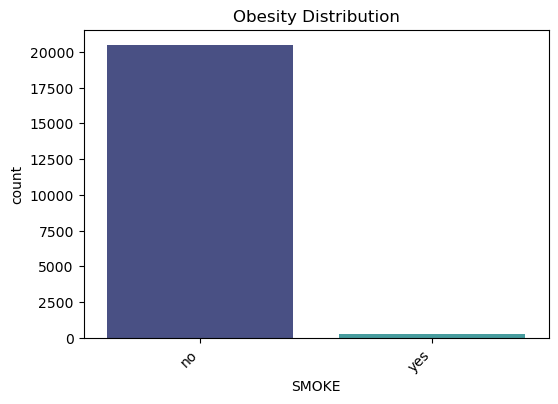

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "SMOKE", data = df_train, palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()


SMOKE is very unbalanced

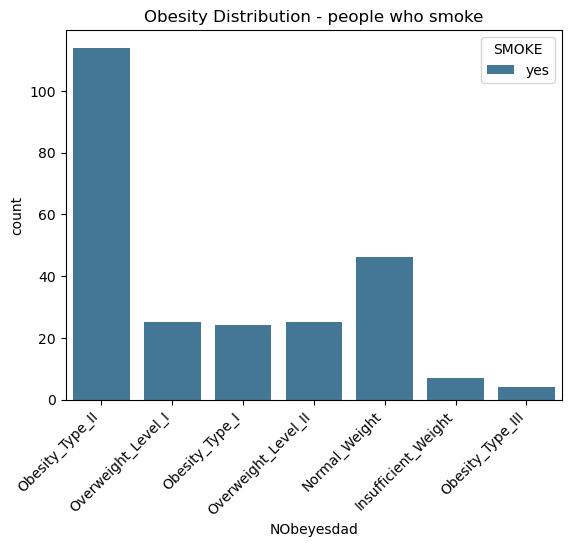

In [ ]:
df_train_smoke = df_train[df_train["SMOKE"] == "yes"]

sns.countplot(x = "NObeyesdad", data = df_train_smoke, hue = "SMOKE", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution - people who smoke")
plt.show()

SMOKE is not a good variable for the model

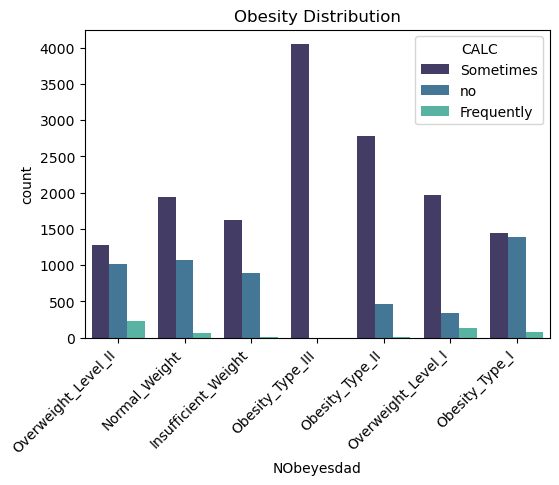

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, hue = "CALC", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()

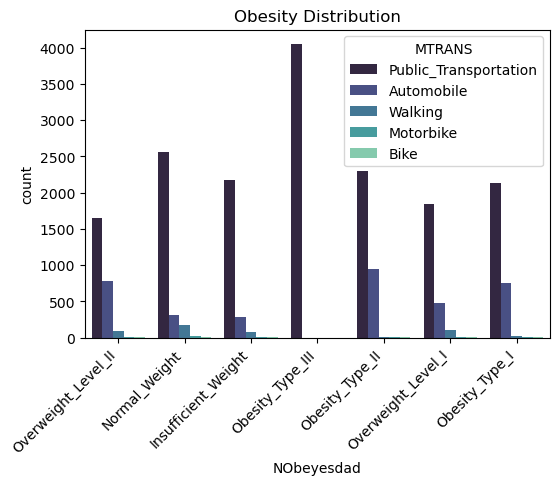

In [ ]:
ax = plt.figure(figsize = (6,4))

sns.countplot(x = "NObeyesdad", data = df_train, hue = "MTRANS", palette = "mako")

plt.xticks(rotation=45, ha='right')
plt.title("Obesity Distribution")
plt.show()

Encoding and preparing pipeline

In [ ]:
weight_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df_train['NObeyesdad'] = df_train['NObeyesdad'].map(weight_mapping)

In [ ]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,3
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,3


In [ ]:
cat_features = ["Gender", "family_history_with_overweight", "FAVC","SCC","CALC", "MTRANS"]
num_features = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]

In [ ]:
#numerical pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipeline = Pipeline([("std_scaler", StandardScaler())])

In [ ]:
#categorical pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_pipeline = Pipeline([("1hot_encoder", OneHotEncoder())])

Aplicando os pipelines

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", cat_pipeline, cat_features)])

In [ ]:
df_train_prepared = full_pipeline.fit_transform(df_train)

In [ ]:
X = df_train_prepared
y = df_train["NObeyesdad"]

Separando os dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Fitting a simple model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf_ver1 = RandomForestClassifier()

In [ ]:
rf_clf_ver1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Evaluating model

from sklearn.metrics import accuracy_score

In [ ]:
y_pred_ver1 = rf_clf_ver1.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_ver1).round(2))

0.88


Model optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
rf_clf_ver2 = RandomForestClassifier()
grid_search = RandomizedSearchCV(rf_clf_ver2, random_grid, cv = 5, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

c:\Users\Rafael Magnusson\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Rafael Magnusson\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Rafael Magnusson\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [ ]:
grid_search.best_score_

0.891636642575183

1% of increase in the accuracy, lets test another model

XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf_ver1 = xgb.XGBClassifier(objective='multi:softprob')

In [ ]:
xgb_clf_ver1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_ver1 = xgb_clf_ver1.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_xgb_ver1).round(3))

0.906


Trying a DNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_test, y_test))

Epoch 1/30


487/487 [==============================] - 3s 4ms/step - loss: 1.3297 - accuracy: 0.5395 - val_loss: 0.9209 - val_accuracy: 0.6491
Epoch 2/30
487/487 [==============================] - 2s 4ms/step - loss: 0.7875 - accuracy: 0.7145 - val_loss: 0.6851 - val_accuracy: 0.7505
Epoch 3/30
487/487 [==============================] - 2s 4ms/step - loss: 0.6198 - accuracy: 0.7847 - val_loss: 0.5626 - val_accuracy: 0.8033
Epoch 4/30
487/487 [==============================] - 2s 4ms/step - loss: 0.5279 - accuracy: 0.8194 - val_loss: 0.4908 - val_accuracy: 0.8304
Epoch 5/30
487/487 [==============================] - 2s 4ms/step - loss: 0.4732 - accuracy: 0.8403 - val_loss: 0.4454 - val_accuracy: 0.8528
Epoch 6/30
487/487 [==============================] - 2s 4ms/step - loss: 0.4396 - accuracy: 0.8521 - val_loss: 0.4175 - val_accuracy: 0.8626
Epoch 7/30
487/487 [==============================] - 2s 4ms/step - loss: 0.4182 - accuracy: 0.8600 - val_loss: 0.3938 - val_accuracy: 0.8644
Epoc

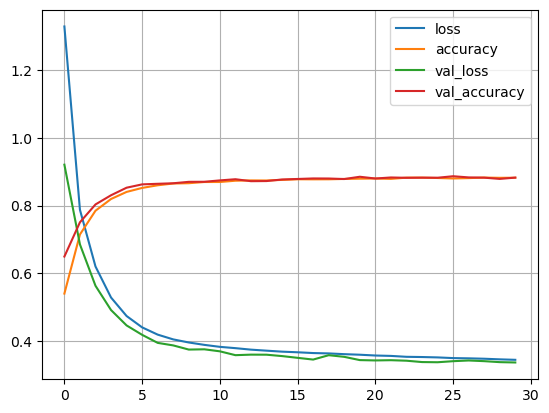

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

We will use XGBoost

Data submission

In [ ]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
df_test['CALC'] = df_test['CALC'].replace('Always', 'Frequently')

In [ ]:
df_test_prepared = full_pipeline.transform(df_test)

In [ ]:
y_test_pred = xgb_clf_ver1.predict(df_test_prepared)

In [ ]:
weight_mapping = {
    0:'Insufficient_Weight',
    1:'Normal_Weight',
    2:'Overweight_Level_I',
    3:'Overweight_Level_II',
    4:'Obesity_Type_I',
    5:'Obesity_Type_II',
    6:'Obesity_Type_III'
}

In [ ]:
def map_weight(x):
    return weight_mapping[x]

y_pred_final = np.vectorize(map_weight)(y_test_pred)

print(y_pred_final)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [ ]:
sample_submission = pd.read_csv(r"C:\Users\Rafael Magnusson\Desktop\VSCode\Obesity_kaggle\sample_submission.csv")

In [ ]:
sample_submission.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [ ]:
sample_submission["NObeyesdad"] = y_pred_final

In [ ]:
sample_submission.to_csv("sub_final", index=False)